In [3]:
import numpy as np
from scipy import sparse
import pandas as pd
import seaborn as sb
from collections import defaultdict
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
%matplotlib inline

In [120]:
df = pd.read_json('./data/train.json')

# X = df.drop(['interest_level'], axis = 1)
X = df
y = df['interest_level']
X['features'] = X["features"].apply(lambda x: " ".join(["_".join(i.split(" ")) for i in x]))
# X['features'] = X["features"].apply(lambda x: " ".join([i for i in x]))

In [121]:
tfidf = CountVectorizer(stop_words='english', max_features=20, min_df=1)
# tfidf = TfidfVectorizer(stop_words='english', max_features=200, min_df=1)
tr_sparse = tfidf.fit_transform(X['features'])
# get the most frequent appearing words
idx = tfidf.vocabulary_
count = defaultdict(int)
for row in df.reset_index().loc[:,'features']:
    fts = row.split(" ")
    for w in fts:
        if w.lower() in idx: count[idx[w.lower()]] += 1
sorted_words = sorted([(count[idx[w]], w) for w in idx], reverse=True)
first_n = 10
for t in sorted_words[:first_n]: print t
sorted_idx = [tfidf.vocabulary_[w[1]] for w in sorted_words]
sorted_arr = tr_sparse.toarray()[:, sorted_idx]
temp = pd.DataFrame(sorted_arr[:, :first_n])
temp.columns = [w[1] for w in sorted_words[:first_n]]
X = pd.concat([X.reset_index(), temp], axis=1)

(26273, u'elevator')
(23558, u'hardwood_floors')
(23540, u'cats_allowed')
(22035, u'dogs_allowed')
(20967, u'doorman')
(20806, u'dishwasher')
(18944, u'laundry_in_building')
(18079, u'no_fee')
(13257, u'fitness_center')
(9435, u'laundry_in_unit')
((49352, 15), (49352, 10))
(49352, 26)


In [122]:
print X.head(10)
# print temp.loc[:, :10]
    

    index  bathrooms  bedrooms                       building_id  \
0      10        1.5         3  53a5b119ba8f7b61d4e010512e0dfc85   
1   10000        1.0         2  c5c8a357cba207596b04d1afd1e4f130   
2  100004        1.0         1  c3ba40552e2120b0acfc3cb5730bb2aa   
3  100007        1.0         1  28d9ad350afeaab8027513a3e52ac8d5   
4  100013        1.0         4                                 0   
5  100014        2.0         4  38a913e46c94a7f46ddf19b756a9640c   
6  100016        1.0         2  3ba49a93260ca5df92fde024cb4ca61f   
7  100020        2.0         1  0372927bcb6a0949613ef5bf893bbac7   
8  100026        1.0         1  a7efbeb58190aa267b4a9121cd0c88c0   
9  100027        2.0         4                                 0   

               created                                        description  \
0  2016-06-24 07:54:24  A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...   
1  2016-06-12 12:19:27                                                      
2  2016-04-17 03:26:

interest_level's distribution with  elevator


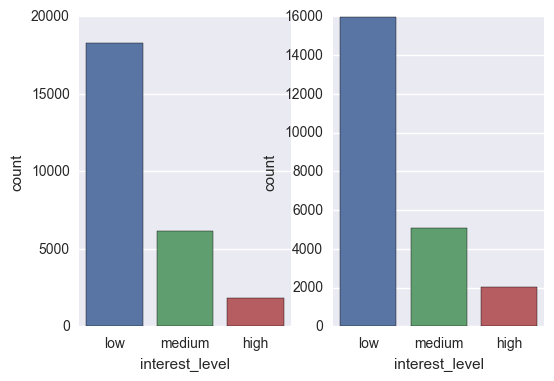

interest_level's distribution with  hardwood_floors


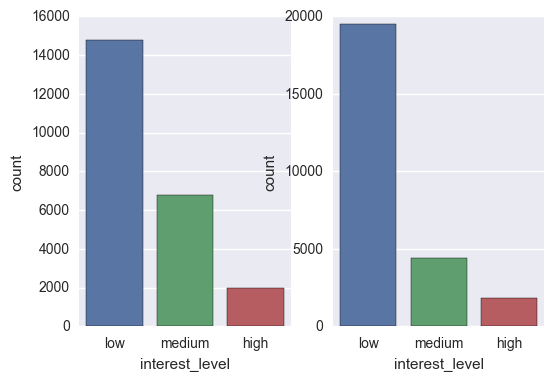

interest_level's distribution with  cats_allowed


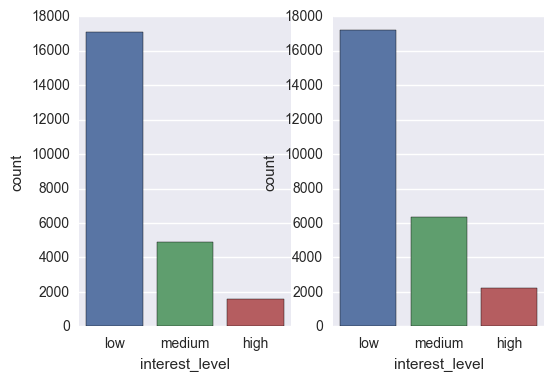

interest_level's distribution with  dogs_allowed


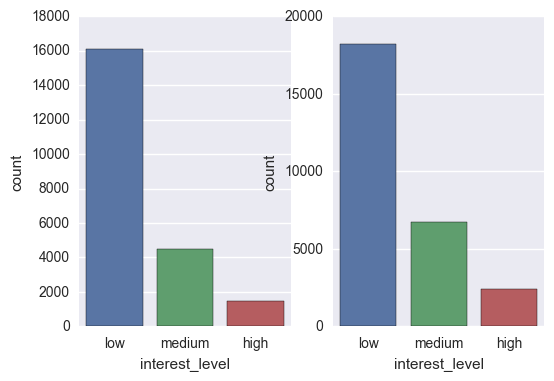

interest_level's distribution with  doorman


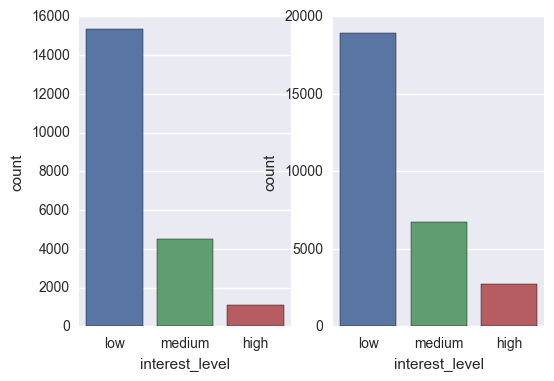

interest_level's distribution with  dishwasher


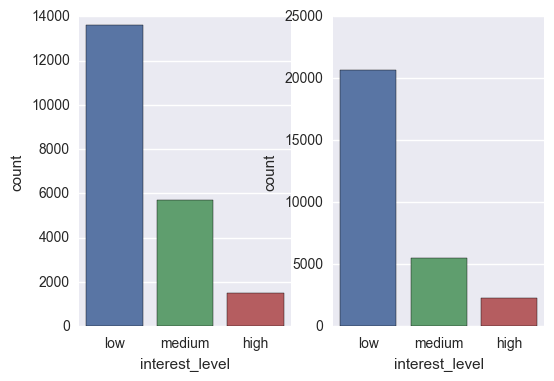

interest_level's distribution with  laundry_in_building


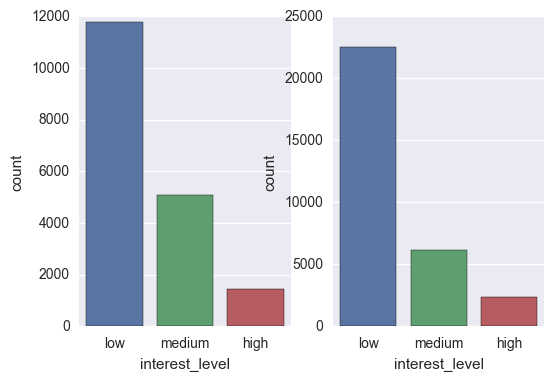

interest_level's distribution with  no_fee


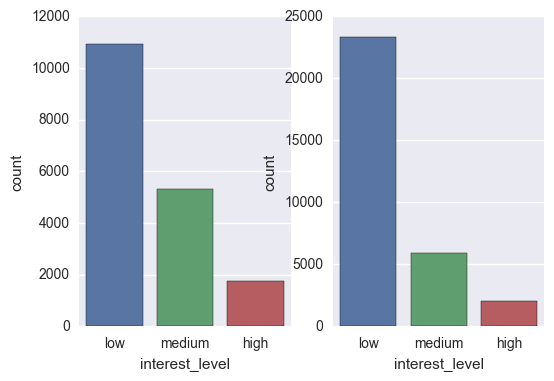

interest_level's distribution with  fitness_center


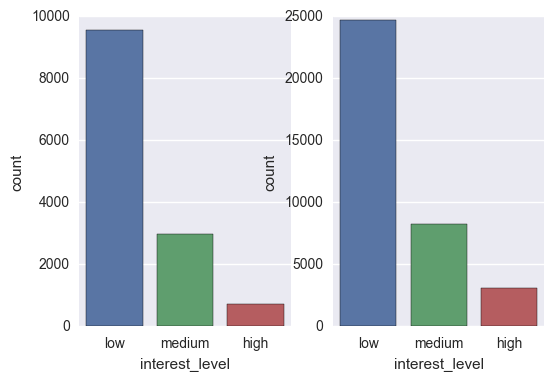

interest_level's distribution with  laundry_in_unit


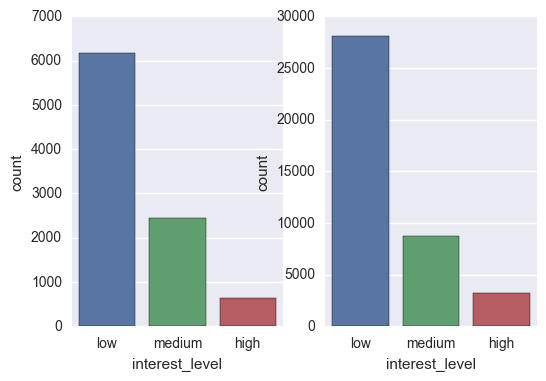

In [163]:
for ft in sorted_words[:first_n]:
    ft_specific_true = X[X[ft[1]]==1]
    ft_specific_false = X[X[ft[1]]!= 1]
    int_level = ft_specific_true['interest_level']
    print 'interest_level\'s distribution with ', ft[1]
    ax1 = plt.subplot(121)
    sb.countplot(x=int_level, order=['low', 'medium', 'high'], ax=ax1)
    int_level = ft_specific_false['interest_level']
    ax2 = plt.subplot(122)
    sb.countplot(x=int_level, order=['low', 'medium', 'high'], ax=ax2)
    plt.show()